In [1]:
import numpy as np
import gmsh
from enum import Enum, auto
from mpi4py import MPI
import matplotlib.pyplot as plt
import os 

[c-a0041532.staff.ad.curtin.edu.au:14591] shmem: mmap: an error occurred while determining whether or not /var/folders/0j/bnxlsh897sl6b1rv06fnt5r80000gp/T//ompi.c-a0041532.502/jf.0/1791033344/sm_segment.c-a0041532.502.6ac10000.0 could be created.


In [2]:
# Initialize the MPI environment
comm = MPI.COMM_WORLD  # Get the global communicator
rank = comm.Get_rank()  # Get the rank of the current process
size = comm.Get_size()  # Get the total number of processes

In [3]:
# Create a dynamic Enum class based on the number of points
def create_boundary_enum(num_points):
    """Dynamically create a boundary Enum class."""
    enum_dict = {f"Boundary{i}": auto() for i in range(num_points)}
    return Enum("Boundaries", enum_dict)

In [4]:
def create_2D_zircon_mesh(points, outputPath='.', csize = 0.01, mesh_name = 'zircon_mesh'):

    if rank == 0:
        points_array = np.array(points)
    
        # Generate the Enum class
        boundaries_2D = create_boundary_enum(len(points))
        
        gmsh.initialize()
        gmsh.model.add(mesh_name)
        
        
        # Create points
        point_ids = [gmsh.model.geo.addPoint(x, y, z, meshSize=csize) for x, y, z in points]
        
        # Create lines by connecting consecutive points and closing the loop
        line_ids = [gmsh.model.geo.addLine(point_ids[i], point_ids[(i + 1) % len(point_ids)]) for i in range(len(point_ids))]
        
        cl = gmsh.model.geo.addCurveLoop(line_ids)
        surface = gmsh.model.geo.addPlaneSurface([cl])
        
        gmsh.model.geo.synchronize()
        
        # Adding physical groups for lines
        for i, line_id in enumerate(line_ids):
            boundary_tag = getattr(boundaries_2D, f"Boundary{i}")
            gmsh.model.addPhysicalGroup(1, [line_id], tag=boundary_tag.value, name=boundary_tag.name)
        
        # Add physical group for the surface
        gmsh.model.addPhysicalGroup(2, [surface], 99999)
        gmsh.model.setPhysicalName(2, 99999, "Elements")
        
        gmsh.model.mesh.generate(2)
        gmsh.write(f'{outputPath}/{mesh_name}.msh')
        
        gmsh.finalize()

        print(f'mesh located can be found: {outputPath}/{mesh_name}.msh', flush=True)

In [11]:
ref_length = 100 ### in microns


mesh_output = './meshes/'

fig_output = './figs/'

os.makedirs(mesh_output, exist_ok=True)
os.makedirs(fig_output, exist_ok=True)


In [6]:
### 70 x 70 micron zircon

zircon1 = [(-35, 20, 0), (-20, 35, 0), (20, 35, 0), (35, 20, 0), 
           (35, -20, 0), (20, -35, 0), (-20, -35, 0), (-35, -20, 0)]

zircon_70_70 = np.array(zircon1)

create_2D_zircon_mesh(zircon_70_70/ref_length, outputPath=mesh_output, csize = 0.01, mesh_name = 'zircon_mesh_70x70')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.000305458s, CPU 0.000464s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0738122s, CPU 0.071858s)
Info    : 5398 nodes 10802 elements
Info    : Writing './meshes//zircon_mesh_70x70.msh'...
Info    : Done writing './meshes//zircon_mesh_70x70.msh'
mesh located can be found: ./meshes//zircon_mesh_70x70.msh


In [7]:
### 80x120 micron zircon

zircon2 = [(-40, 35, 0), (-25, 60, 0), (25, 60, 0), (40, 35, 0), 
           (40, -35, 0), (25, -60, 0), (-25, -60, 0), (-40, -35, 0)]

zircon_80_120 = np.array(zircon2)

create_2D_zircon_mesh(zircon_80_120/ref_length, outputPath=mesh_output, csize = 0.01, mesh_name = 'zircon_mesh_80x120')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.000349583s, CPU 0.000472s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.156051s, CPU 0.152177s)
Info    : 10610 nodes 21226 elements
Info    : Writing './meshes//zircon_mesh_80x120.msh'...
Info    : Done writing './meshes//zircon_mesh_80x120.msh'
mesh located can be found: ./meshes//zircon_mesh_80x120.msh


In [30]:
### 90x160 micron zircon

zircon3 = [(-45, 40, 0), (-30, 80, 0), (30, 80, 0), (45, 40, 0), 
           (45, -40, 0), (30, -80, 0), (-30, -80, 0), (-45, -40, 0)]

zircon_90_160 = np.array(zircon3)

create_2D_zircon_mesh(zircon_90_160/ref_length, outputPath=mesh_output, csize = 0.01, mesh_name = 'zircon_mesh_90x160')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00102063s, CPU 0.001181s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.240864s, CPU 0.234619s)
Info    : 15599 nodes 31204 elements
Info    : Writing './meshes//zircon_mesh_90x160.msh'...
Info    : Done writing './meshes//zircon_mesh_90x160.msh'
mesh located can be found: ./meshes//zircon_mesh_90x160.msh


In [31]:
### 100x200 micron zircon

zircon4 = [(-50, 50, 0), (-35, 100, 0), (35, 100, 0), (50, 50, 0), 
           (50, -50, 0), (35, -100, 0), (-35, -100, 0), (-50, -50, 0)]

zircon_100_200 = np.array(zircon4)

create_2D_zircon_mesh(zircon_100_200/ref_length, outputPath=mesh_output, csize = 0.01, mesh_name = 'zircon_mesh_100x200')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 70%] Meshing curve 6 (Line)
Info    : [ 80%] Meshing curve 7 (Line)
Info    : [ 90%] Meshing curve 8 (Line)
Info    : Done meshing 1D (Wall 0.00134267s, CPU 0.001657s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.344692s, CPU 0.337077s)
Info    : 21965 nodes 43936 elements
Info    : Writing './meshes//zircon_mesh_100x200.msh'...
Info    : Done writing './meshes//zircon_mesh_100x200.msh'
mesh located can be found: ./meshes//zircon_mesh_100x200.msh


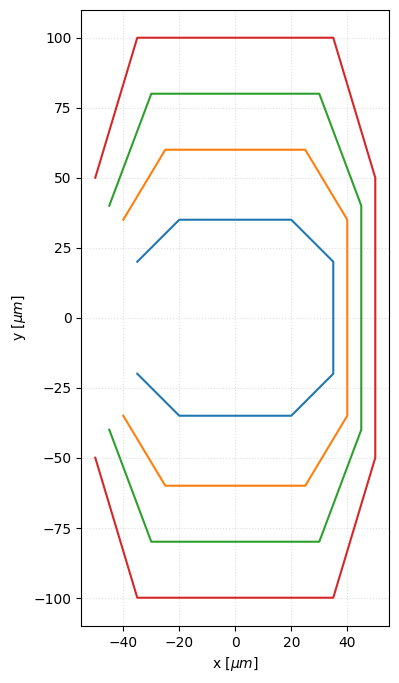

In [32]:
plt.figure( figsize=(4, 8) )
plt.plot(zircon_70_70[:,0], zircon_70_70[:,1], label='zircon 1')
plt.plot(zircon_80_120[:,0], zircon_80_120[:,1], label='zircon 2')
plt.plot(zircon_90_160[:,0], zircon_90_160[:,1], label='zircon 3')
plt.plot(zircon_100_200[:,0], zircon_100_200[:,1], label='zircon 4')

plt.axis('scaled')
plt.grid(alpha=0.4, ls=':')

plt.xlabel(r'x [$\mu m$]')
plt.ylabel(r'y [$\mu m$]')

plt.savefig(f'{fig_output}mesh_geom.pdf')